# Realtime plots of running code
March 30, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import subprocess as sp

## Run the code 
Can do this in a separate terminal as well

In [9]:
L=32

In [10]:
fname='run_solvers_laplace_2d.py --solver CG --m 0.2 --iters 3000 --L {0}'.format(L)
# fname='run_solvers_laplace_2d.py --solver GS --m 0.2 --iters 3000 --L {0}'.format(L)
# fname='run_solvers_laplace_2d.py --solver Jacobi --m 0.2 --iters 3000 --L {0}'.format(L)
cmd='python {0}'.format(fname)
print(cmd)

python run_solvers_laplace_2d.py --solver CG --m 0.2 --iters 3000 --L 32


In [11]:
op=sp.check_output(cmd,shell=True)
print(op)

b'Running CG with m 0.20, L 32 for max 3000 iters\nQuitting after 77 iterations\n'


## Plot the solution from saved file, as code runs.

Reads data from file. 

Data must be in the form : iter,x[0],x[1],x[2]...\n format

i.e. iteration number and solution, comma separated with new line at the end.

In [12]:
## Convert solution from 1D array to 2D array
def f_get_2d_image(arr,L):
    img_arr=np.zeros((L,L),dtype=np.float64)
    for x in range(L):
        for y in range(L):
            img_arr[x,y]=arr[x+y*L]
    
    return img_arr


In [13]:
def f_plot_realtime(op_file,first=0,last=50,step=1,pause=1,last_only=False):
    '''
    num= Number of plots you want
    pause=time before it loads next dataset
    last_only= True implies it will only plot the last line of the file
    
    '''
    
    plt.rcParams["figure.figsize"]=(9,9)
    for i in range(first,last,step):
        # Read file. Do this each time so that update of file by the code can be taken into account
        with open(op_file,'r') as f:
            lst=f.readlines()

        if last_only: idx=-1 ## Plot just the last entry of the file
        else: idx=i
        
        # return lst
        total=len(lst)
        if idx>=total: break

        ## Pick selected iteration from file
        k=int(lst[idx].split(',')[0])
        
        y=np.array(lst[idx].split(',')[1:]).astype(np.float64)
        L=int(np.sqrt(y.shape[0]))
        img_arr=f_get_2d_image(y,L)
        clear_output(wait=True)  
        # print(i,img_arr)
        plt.title('Iteration={0}'.format(k))
        plt.imshow(img_arr)
        plt.pause(pause)
        plt.draw()


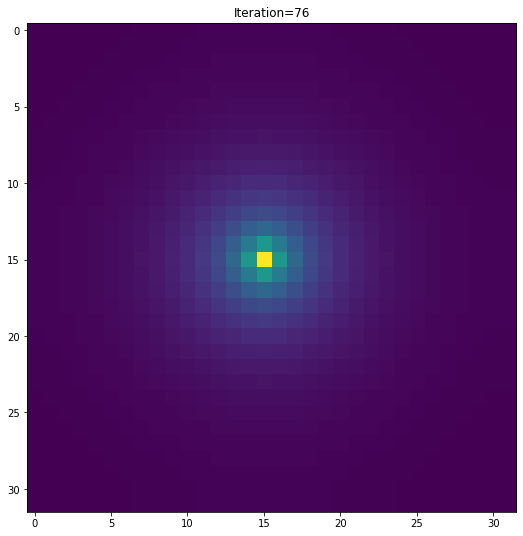

<Figure size 648x648 with 0 Axes>

In [14]:
ans=f_plot_realtime(op_file='op2.out',first=0,last=150,step=3,pause=1,last_only=False)